<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01684852/blob/main/Semana_5_Data_Analysis_with_Python_(IBM)_A01684852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 Semana 5

## Pre-Processing Data in Python
- Identify and handle missing values
- Data Formatting
- Data Normalization (centering/scaling)
- Data Binning
- Turning Categorical values to numeric values

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df=pd.read_csv(url, header = None)

headers=["symboling", "normalized-losses","make","fuel-type","asporation","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers

df.head(5)

,symboling,normalized-losses,make,fuel-type,asporation,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Para acceder a una columna en específico, puedo llamar al dataframe y el nombre de su columna, por ejemplo

In [ ]:
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

Puedo modificar la columna sumando un 1, si hago lo siguiente

In [ ]:
df["symboling"] = df["symboling"]+1
df["symboling"]

0      4
1      4
2      2
3      3
4      3
      ..
200    0
201    0
202    0
203    0
204    0
Name: symboling, Length: 205, dtype: int64

## Dealing with Missing Values

Missing values occur when no data value is sotred for a variable (feature) in observation

- Could be represented as"?", "N/A", or just a blank cell

Para trabajar con datos faltantes se puede revisar si hay forma de estimar los datos faltantes o si es mejor eliminar la fila o columna completa, al final cada caso será particular y de eso dependerá la mejor opción

Se tiene que hacer algo que reduzca el menor impacto

Reemplazar los datos a veces es lo mejor pero menos preciso, una forma de hacerlo puede ser con el promedio de los valores de la columna, sin embargo, dependerá de lo que se está analizando

Para variables categóricas donde no hay promedio, quizá se pueda usar la moda, por ejemplo en el ejericio de marca de carros

A veces quizá sea lo mejor dejar los datos faltantes como missing

### Drop missing values in Python

Python cuenta con una función para eliminar los datos faltantes llamada "dropna() que borra los NaN

Se tiene que especificar el eje, el cual borrará la fila o la columna:
- axis=0 drops the entire row
- axis=1 drops the entire column

Otro punto muy importante en este ejemplo es que si el valor que queremos predecir tiene NaN (missing values), lo mejor será borrar toda la fila

El código sería el siguiente:

df.dropna(subset=["price"], axis=0, inplace = True)

- Con axis=0 decimos que borre todas las filas con campos NaN, y con inplace=True se mantengan los cambios en el mismo dataframe

- es el similar de:

df= df.dropna(subset=["price"], axis=0)

- Es importante saber que esto no genera ningún cambio en el dataframe, pero ayuda a ver los cambios

df.dropna(subset=["price"], axis=0)


### Replace Missing Values

Se pueden reemplazar valores faltantes con el comando .replace(missing_value, new_value)

Por ejemplo si queremos reemplazar este valor NaN por el promedio, lo que tendríamos que hacer es lo siguiente

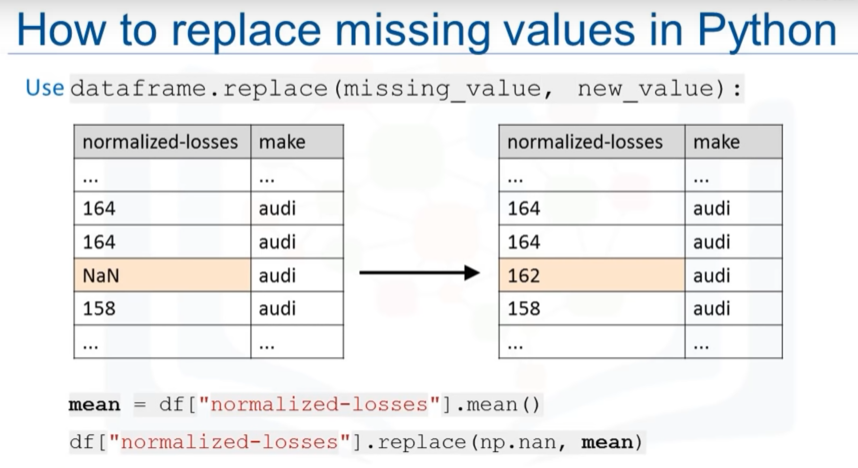

Con lo anterior se le especifica que para esa columna y los valores NaN, se reemplace con el promedio

## Data Fromatting
Los datos se recolectan de distintos lugares y en distintos formatos
Es importante estandarizar esta información para poder hacer buenas comparativas


Por ejemplo en la siguiente imagen representamos información obtenida de distintas fuentes en donde para nombrar a New York utilizan estas formas

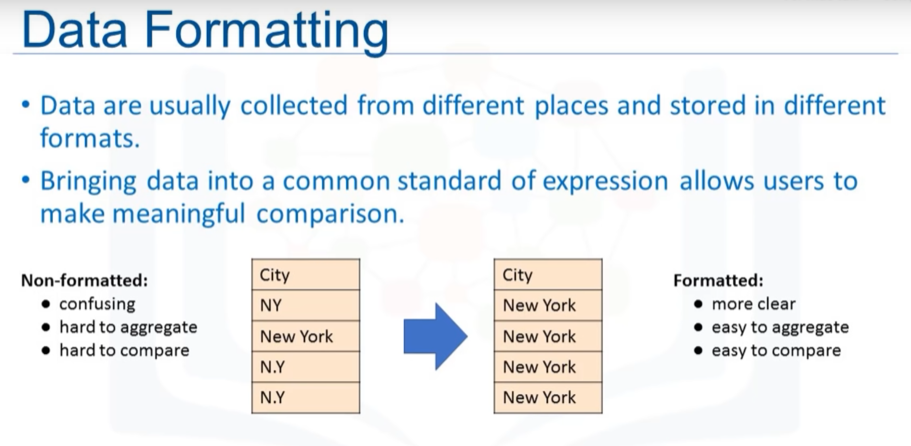

A todo esto debemos limpiar la data y homologar la información, esto nos ayudará en nuestro análisis estadístico

Otro ejemplo es si tenemos una columna en mpg y queremos transformar a L/100km, debemos hacer la transformación

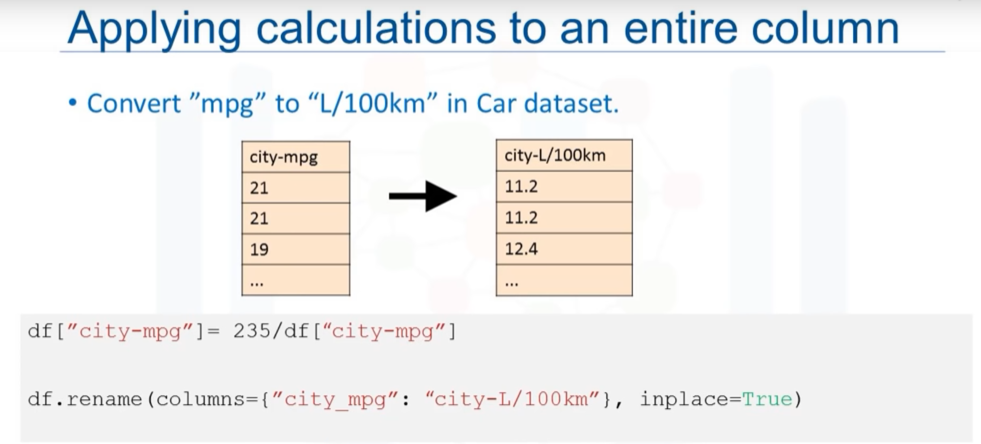

df["city-mpg"] = 235/df["city-mpg"]

df.rename(columns={"city_mpg": "city-L/100km"}, inplace = True)

Incorrect data types

En ocasiones python no reconoce el formato de una columna y asigna otro type, en ej:



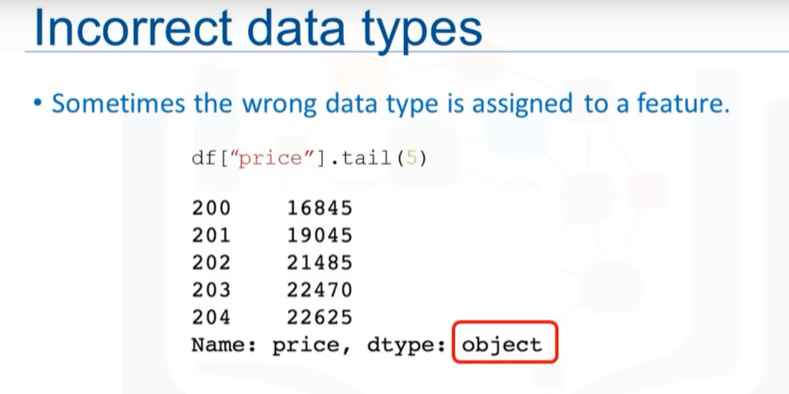

Hay muchos Types en Pandas como:

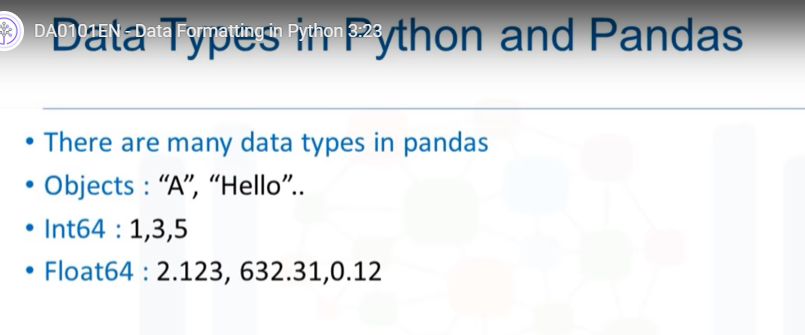

Para identificar lso data types los revisamos con:
- dataframe.dtypes()

Para convertir dtypes, utilizamos:
- dataframe.astype()
- ej:  df["price"] = df["price"].astype("int")



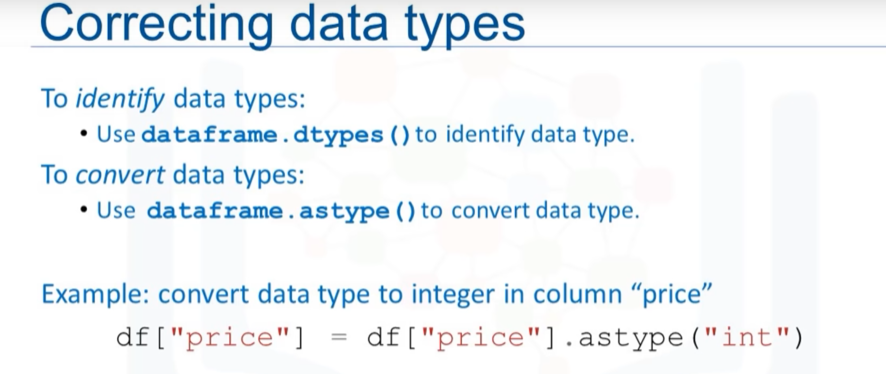

## Data Normalization

Se utiliza para uniformizar los valores de distintos rangos y hacer más sencillos los análisis estadísticos

En el ejemplo siguiente vemos una diferencia muy grande entre las columnas, en este caso, cuando realicemos más adelante un análisis de regresión lineal, el atributo de income influenciará más intrínsicamente al resultado ya que su valor tan grande, lo cual le dará un peso mayor a este parámetro, que a la edad

Para evitar esto, podemos normalizar ambas variables en rangos de 0 a 1, una vez realizado esto, ambas variables tendrán una influencia similar en los modelos

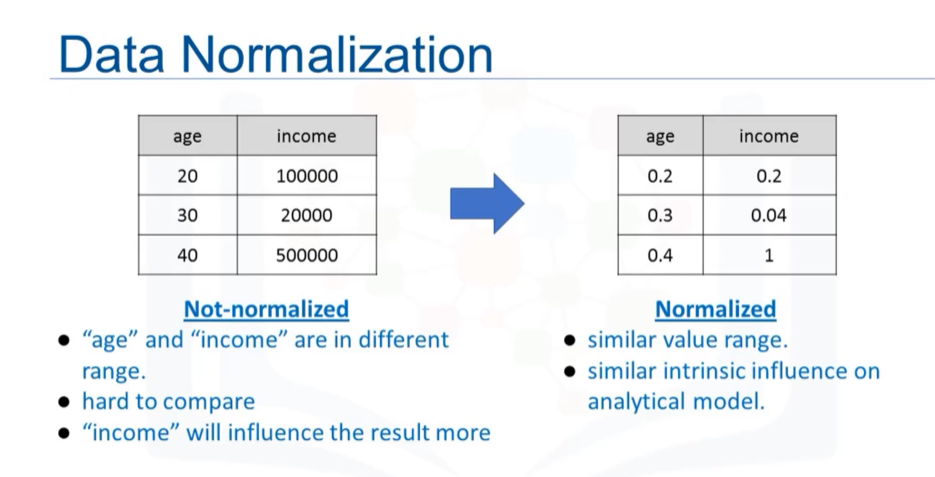

### Métodos de Normalización de Datos

1.- Simple feature scaling: Solamente divide cada dato por el valor máximo de cada feature, esto dará de vuelta un nuevo rango entre 0 y 1

2.- Min-Max: Toma cada valor, X_old, y se le resta el valor menor de ese feature, y se divide por el rango de ese feature, de nuevo entrega un resultado en un rango entre 0 y 1

3.-z-score o standar score: cada valor se le resta el promedio del feature, y después se divide entre la desviación estándar, resultando un valor sobre 0, y normalmente en un rango entre -3 y 3, pero puede ser mayor o menor

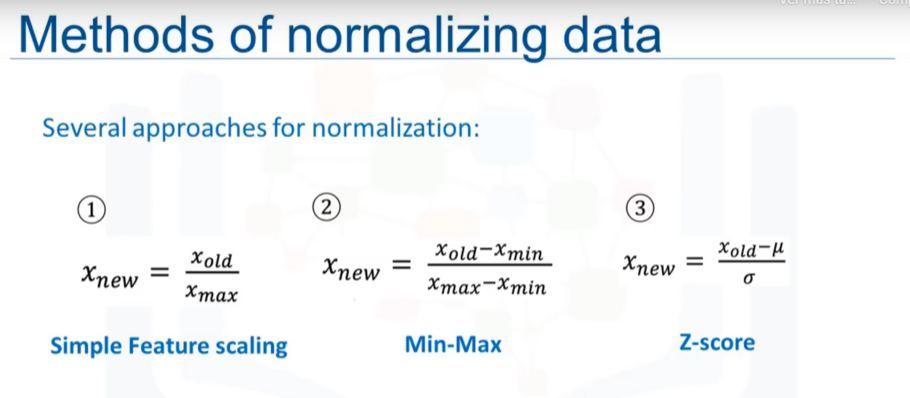

#### Ejemplo de Scaling

Simple Feature Scaling

df["length"]=df["length"]/df["length"].max

Aquí divide cada valor de la columna entre el valor máximo de la columna, y estp se hace en una sola línea de código

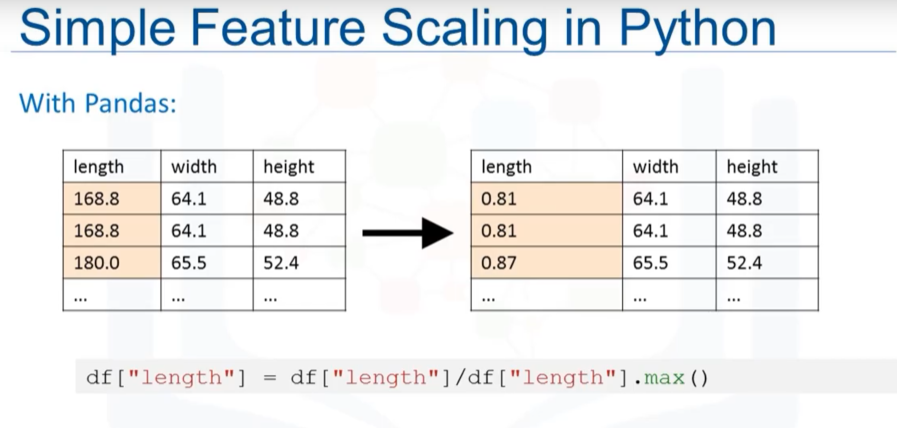

Min-Max

df["length"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())

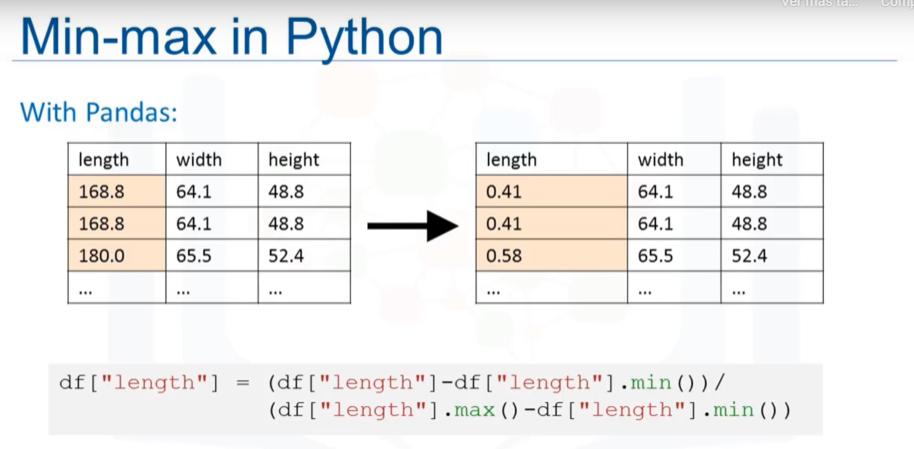

Z-score

df["length"]=(df["length"].mean()/df["length"].std()

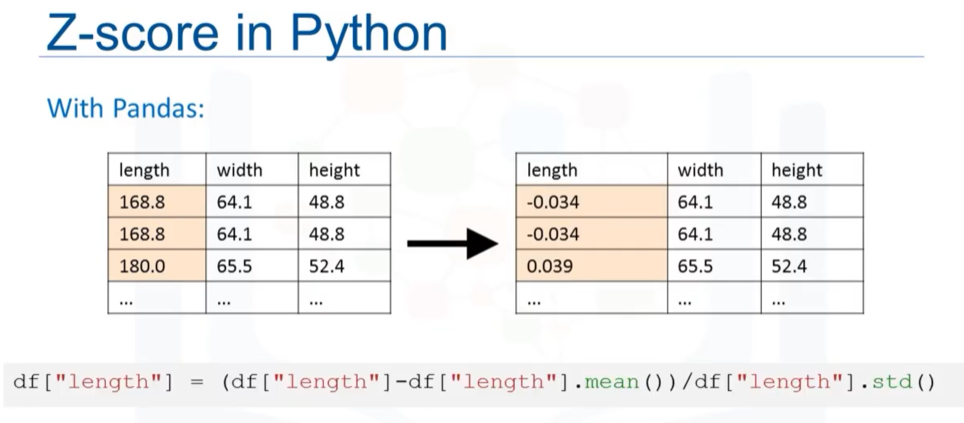

## Bining
Sirve para agrupar valores en bins. por ejemplo, podemos agrupar la edad en rangos de [0 a 5], [6 a 10], [11 a 15]

En algunos casos el hacer bining puede mejorar la precisión en modelos predictivos

En ocasiones usamos el data binning para agrupar un conjunto de valores numéricos en un menor grupo de bins para tener un mejor entendimiento de la distribución de datos, por ejemplo en lugar de tener rangos de precios de 5,000 a 45,500, podemos categorizar en tres bins: precio bajo, precio medio y precio alto

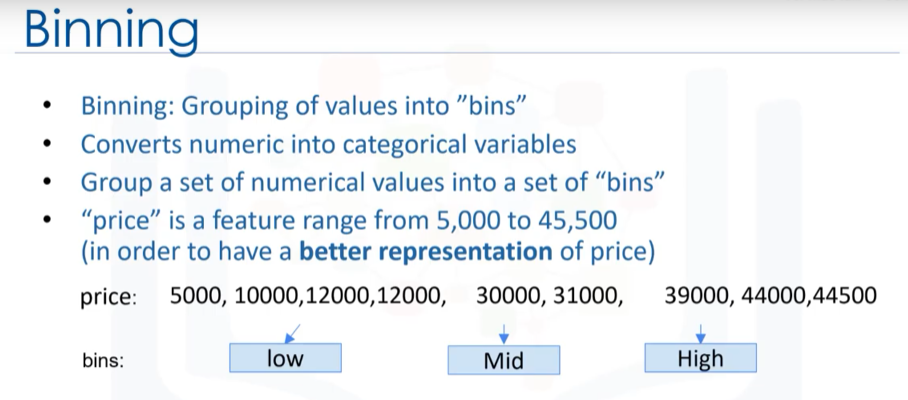

Para hacer esto, debemos crear los bins de la siguiente forma

bins = np.linspace(min(df["price"]),max(df["price"]),4)
group_names=["Low", "Medium", "High"]
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names, include_lowest=True)

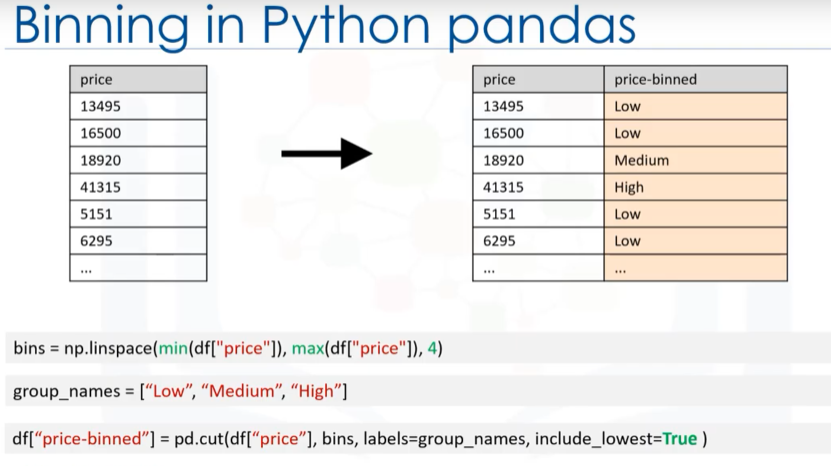

Podemos también hacer histogramas con la información que hicimos para ver su distribución


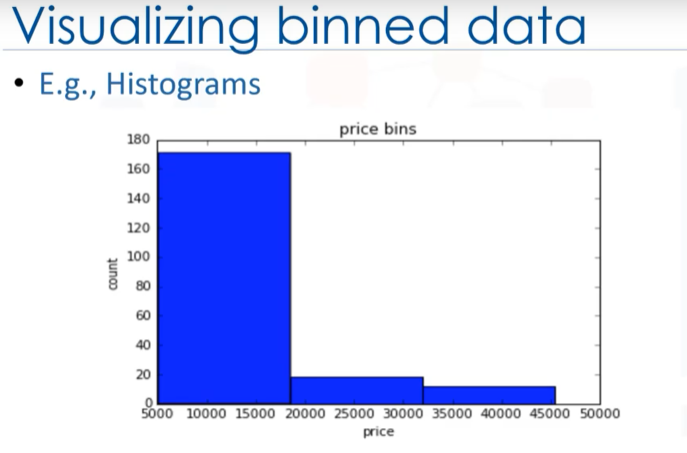

## Turning Categorical values into numerical values

Nos ayuda ena signar variables dummy a una categoría, en donde por ejemplo, podrían ser 0 y 1 como en el ejemplo siguiente

En este ejemplo se asignó un 0 si es diesel y un 1 si es gas

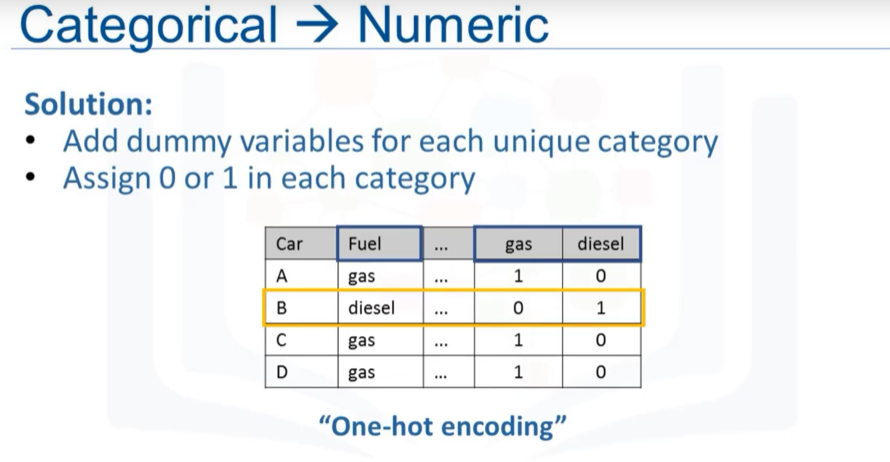

En Python usamos **pandas.get_dummies()** method para convertir variables categóricas a variables dummy, lo que genera python de manera automática son dos columnas nuevas con la variable asignada a la variable categórica

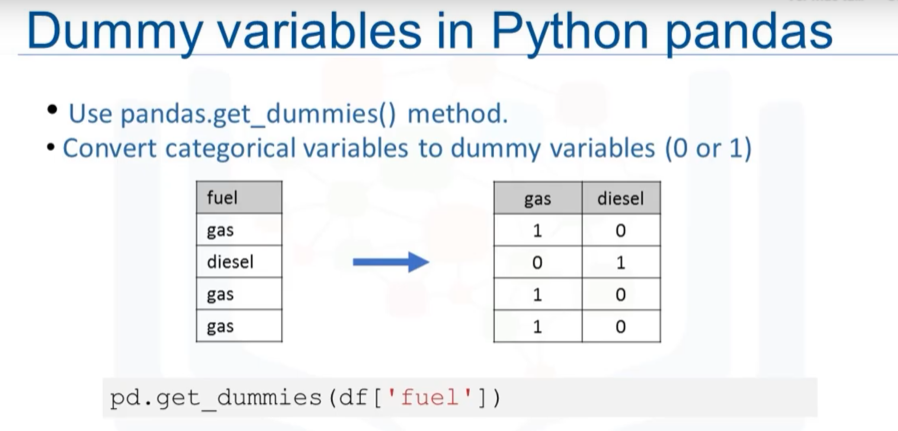

# Examen

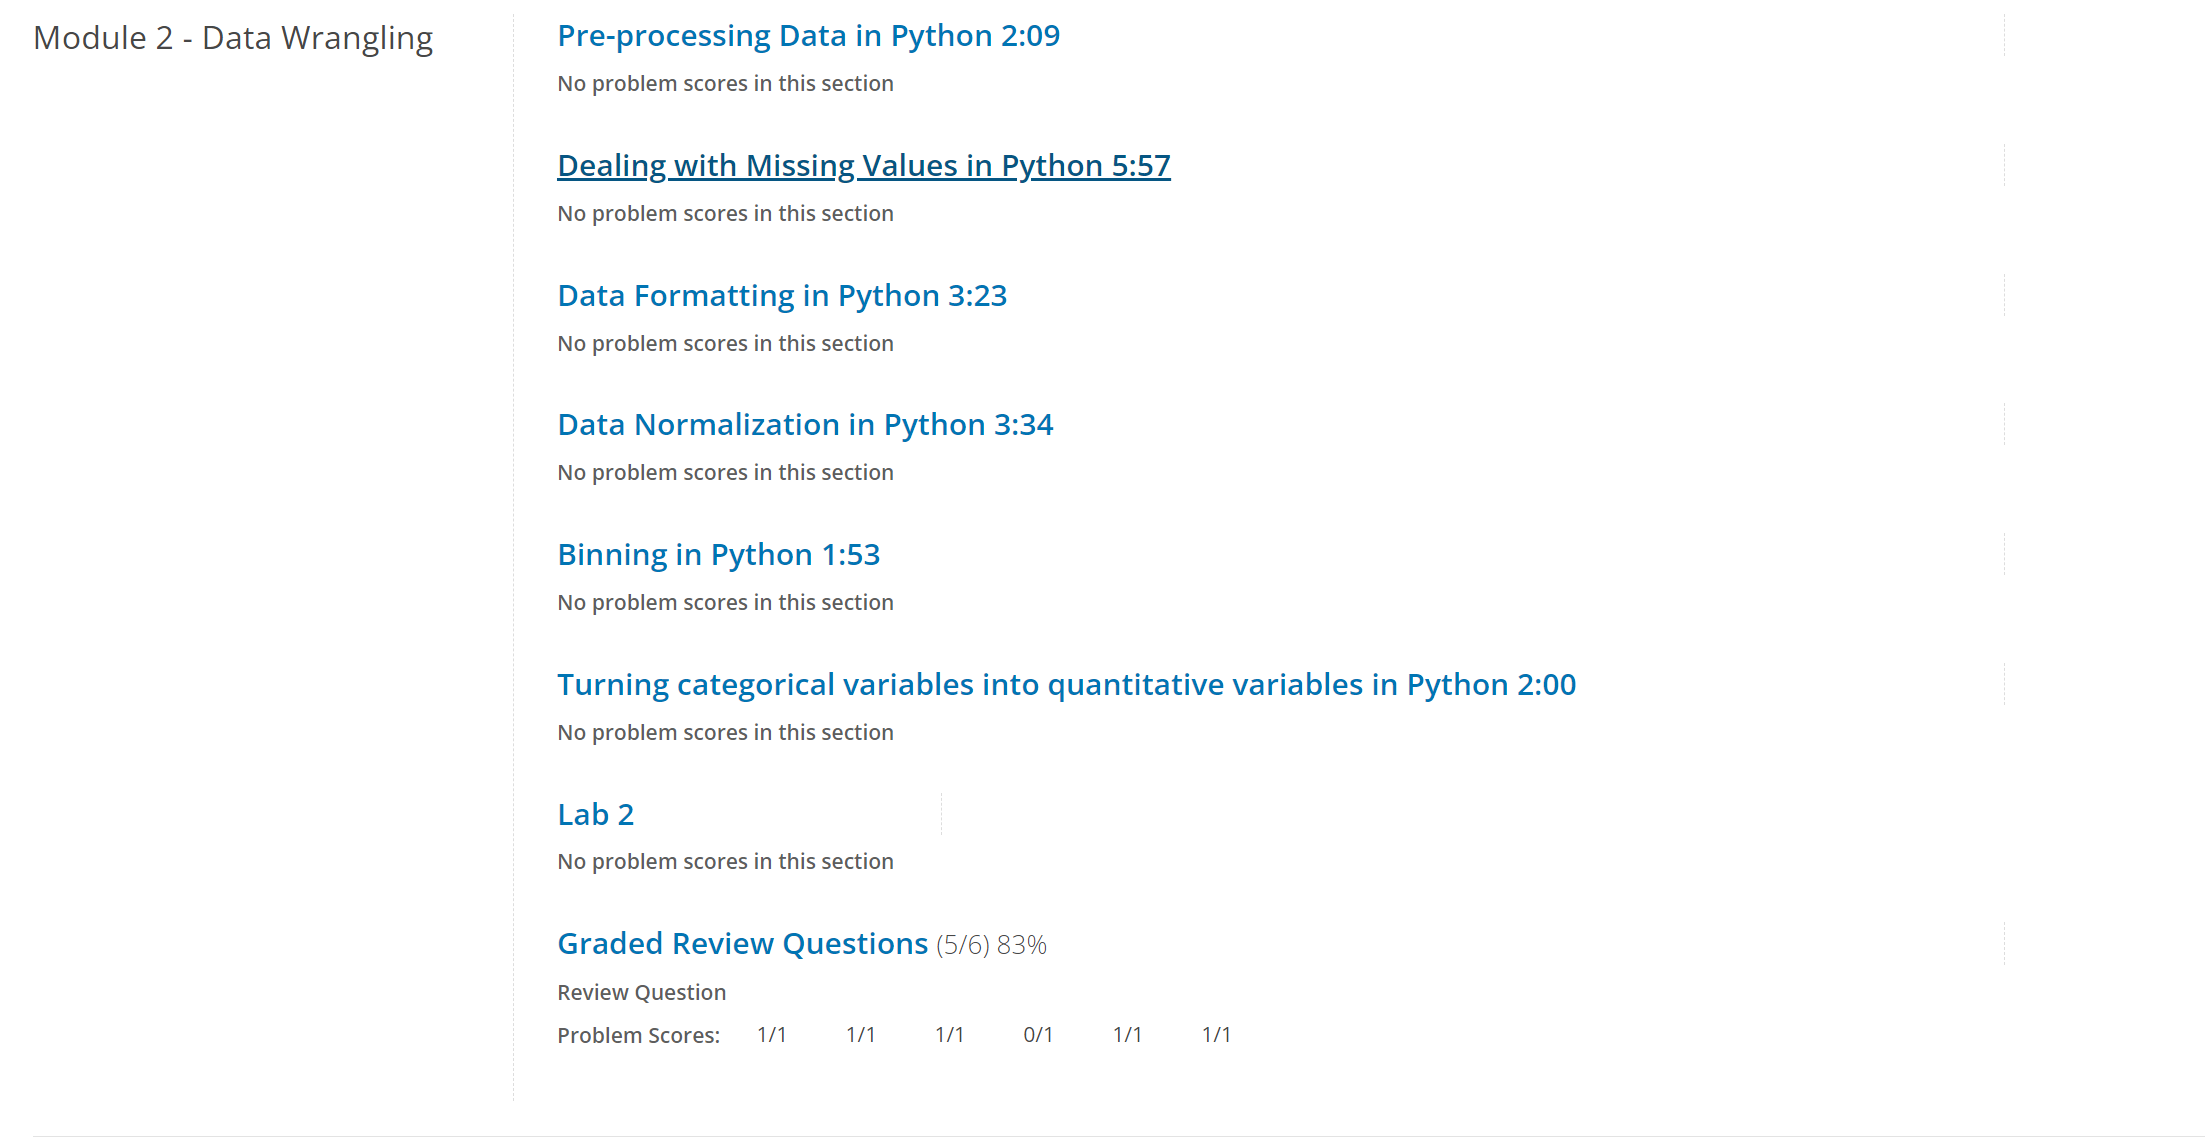